# **인과 포레스트(Casual Forest)**
* **작성자:** (이형돈)
---

## **논문:  Estimation and Inference of Heterogeneous Treatment Effects using Random Forests(Journal of the American Statistical Association,2018)**

과거에는 데이터가 부족해서 전체 샘플을 몇 개 그룹으로 나누어 분석하는 것 이상은 어려웠다. 하지만 최근에는 개인별 맞춤 추정이 가능할 정도로 데이터가 풍부해졌다. 풍부해진 데이터를 분석하기에 전통적인 방법론들로는 한계가 존재하였고, 이를 해결하기 위해 랜덤 포레스트가 등장하였다. 랜덤 포레스트는 예측 분야에서 매우 중요한 도구가 되었지만, 인과추론에 적용하기에는 추정치의 점근적 샘플링 분포를 알지 못하는 문제가 있었다. 저자들은 이런 문제를 해결하고 랜덤 포레스트를 인과추론에 활용하는 인과 포레스트를 제안한다

인과 포레스트의 표준적인 틀은 잠재적 결과 모형이다. 이는 모든 개체 $i$는 처치를 받았을 때와 받지 않았을 때의 결과를 모두 잠재적으로 가지고 있다고 가정한다. 우리가 추정하려는 목표는 특정 특성을 가진 사람들의 조건부 평균 처치 효과이다. 하지만 현실에서는 한 사람에게 두 가지 잠재적 결과를 동시에 관찰할 수 없다. 따라서 비슷한 특성을 가진 사람들 사이에서는 누가 처치를 받고 안 받는지가 거의 무작위라는 비혼재성 가정을 세운다.

랜덤 포레스트의 회귀나무는 데이터의 특성을 기준으로 데이터를 반복적으로 나누어 여러개의 최종 노드로 구성된 파티션을 만든다. 새로운 데이터x가 들어오면 이 데이터가 속한 노드를 찾는다. 그리고 그 노드에 포함된 훈련 데이터들의 결과의 평균값을 x에 대한 예측값으로 사용한다.

인과 포레스트의 인과나무도 마찬가지로 데이터를 여러개의 최종 노드로 나눈다. 비혼재성 가정 덕분에, 하나의 노드안에 있는 데이터들은 마치 작은 규모의 무작위 배정 실험을 한 것과 같다고 생각할 수 있다. 따라서 특정 노드안에서의 처치 효과$\hat{\tau}(x)$는 매우 직관적인 방법으로 추정할 수 있다.
 .
*   $\hat{\tau}(x)=(L 노드 내 처치 그룹의 평균 Y) - (L 노드 내 통제 그룹의 평균 Y)$

이렇게 만든 하나의 나무는 불안정하고 예측이 성능이 떨어질 수 있다. 이를 해결하기 위해 숲을 만든다. 숲은 만드는 방법은 다음과같다.


1.   훈련 데이터의 일부를 무작위로 뽑아 하나의 인과나무를 만들고 이 과정을 반복한다.
2.   이렇게 만들어진 모든 인과나무가 내놓은 예측값 $\hat{\tau}_b(x)$들을 단순 평균하여 최종 처치 효과 추정치를 구한다.




이렇게 만들어진 인과 포레스트가 통계적으로 신뢰할 수 있는지 확인해볼 수 있다. 기존 나무는 동일한 데이터를 가지고 어디를 나눌지 기준을 정하고 평균값을 계산하는데, 이는 결과가 과적합되어 편향이 발생할 위험이 높다. 따라서 편향을 제거하기 정규분포에 근사시키기 위해 정직성이라는 강력한 조건을 도입한다. 정직성이란 어떤 훈련 데이터의 결과값은 나무의 분기 기준을 정하는데 사용되거나, 혹은 최종 노드 내의 값을 추정하는데 사용되거나, 둘 중 한가지 역할만 해야 한다는 원칙이다. 정직성을 구현하는 방법에는 두 가지가 있다.

1.   이중표본 나무: 나무 하나를 훈련시킬 데이터를 무작위로 절반씩 나눈다. 첫 번째 절반은 분기 기준을 정하는데만 사용하고, 나머지 절반은 실제 처치 효과를 계산하는 데만 사용된다.
2.   성향 나무: 나무의 분기 기준을 정할 때 결과 값은 보지않고, 오직 처치 여부와 특성만을 이용한다. 결과 값은 분기 과정에서 완전히 배제되었으므로, 나중에 노드내 효과를 정직하게 추정하는데 사용될 수 있다.

정직한 인과 포레스트의 추정치$\hat{\tau}(x)$는 다음과 같은 통계적 성질을 갖는다.


*   일관성: 데이터가 많아질수록 추정치는 우리가 알고 싶어하는 실제 처치 효과로 수렴한다.
*   점근적 정규성: 표본의 크기가 충분히 크다면, 추정치의 샘플링 분포는 정규분포를 따른다.
*   중심성: 위에서의 정규분포의 중심이 바로 실제 처치 효과가된다.

이 세가지를 종합하면, 인과 포레스트의 추정치를 이용하여 신뢰구간을 계산하고 가설검정을 하는 등 전통적이 통계학의 엄밀한 추론을 할 수 있게된다.








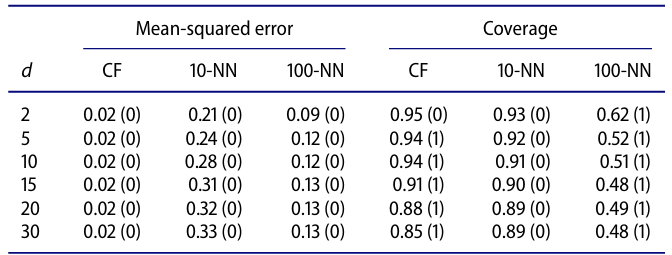


가상의 데이터를 통하여 이론이 현실에 잘 작동하는지 확인하였을 때, 관련 없는 변수가 많은 고차원 데이터의 상황에서 인과 포레스트는 k-NN에 비해 절대 평균 오차가 압도적으로 낮았다. 또한 인과 포레스트가 계산한 95% 신뢰구간은 여러 실험 환경에서 목표치인 95%에 가까운 포함률을 보여주었다.

---
## **논문:  Political backlash to refugee settlement: Cultural and economic drivers(Journal of Public Economics,2025)**

최근 선진국으로 유입되는 난민 증가는 여러 사회 정치적 우려를 낳았다. 2015년 150만명 이상의 난민이 유럽으로 유입되는 유럽 난민 위기는 대중의 적대감을 키웠고 반이민에 대한 정치적 반발이 강해졌다. 하지만 이러한 정치적 반발은 지역 공동체별로 매우 큰 편차가 존재하는데, 이를 확인하기 위해 이 연구는 인과 포레스트를 사용하여 분석한다.

연구 대상은 유럽 난민 위기에 크게 노출되었던 이탈리아다. 당시 이탈리아 정부는 난민들을 전국에 무작위로 배치하였기 때문에, 난민에 대한 지역의 편향 문제가 해결되어 인과관계를 연구하기에 적합한 데이터다. 기본적으로 난민 위기 이전, 이후를 나누어 이중차분법을 사용하고 이질적인 효과를 정밀하게 분석하기 위해 인과포레스트를 사용한다.

연구의 종속 변수는 반이민 정당의 득표율 변화이다. 난민 위기 이전과 이후 총선의 득표율을 비교한다. 이탈리아의 주요 반이민 정당의 득표율은 8%에서 25.5%까지 득표율이 급증하였다. 이질성 분석을 위한 독립변수는 크게 3가지로 나누어 분석한다. 첫 번째, 경제적 요인은 1인당 소득,고용률 등 표준적인 경제 지표를 활용한다.
두 번째, 결속형 사회적 자본은 그룹 내 구성원 간의 동질성과 유대감을 의미한다. 국민투표 참여율,헌혈률 등이 포함된다. 세 번째, 교량형 사회적 자본은 서로 다른 간의 연결과 교류를 의미한다. 다른 그룹간의 의미있는 상호작용이 편견을 줄일 수 있다는 이론에 기반한다. 국제 결혼비율,이민자의 귀화율 등이 포함된다.

이중차분법으로 분석한 결과, 난민 유입은 반이민 정당의 득표율을 증가시켯고, 그 효과는 경제적으로 부유한 지자체에서 훨씬 더 크게 나타나였다. 이 결과는 부유한 원주민들이 자신들의 복지 혜택을 난민과 나누는 것을 꺼린다는 가설을 지지한다. 두 번째로 결속형 사회적 자본이 난민에 대한 정치적 반발을 상당히 악화시키는 것으로 드러났다. 세번 째로 교량형 사회적 자본이 높을 수록 난민에 대한 정치적 반발이 통계적으로 유의미하게 감소하였다.

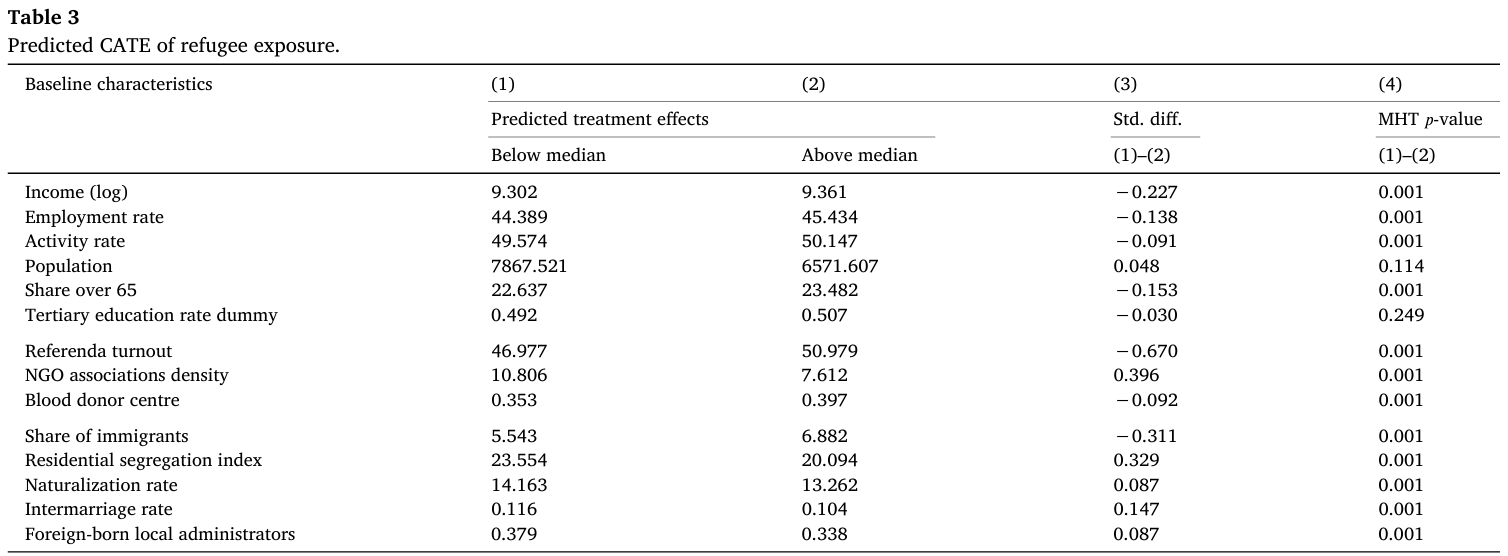

인과 포레스트를 사용한 분석 결과는 Table 3에 표로 정리되어있다. 모든 지자체 각각에 조건부 평균 처치 효과(CATE)를 추정하였을 때, 난민 수용에 대한 정치적 반발력은 지역별로 매우 큰 차이를 보였다. CATE가 중앙값보다 큰 고반발 그룹과 저반발 그룹으로 나누었을 때, 결과는 이전의 선형 분석 결과와 거의 일치하였다.


*   경제적요인: 고반발 그룹은 저반발 그룹에 비해 평균적으로 소득,고용률,활동률이 더 많았다.
*   결속형 사회적 자본: 고반발 그룹은 저반발 그룹에 비해 평균적으로 국민 투표 참여율이 더 높았다.
*   교량형 사회적 자본: 고반발 그룹은 저반발 그룹에 비해 국제 결혼 비율과 외국 태생 지방의원 수가 더 적었다.

더 심화적인 인과 포레스트를 사용하여도, 기존의 선형회귀의 핵심 결론이 그대로 유지되어 분석결과가 견고함을 보여주었다.


이러한 CATE를 활용하여 실제 정책보다 더 나은 가상의 난민 재배치 정책을 설계할 수 있다. 인과 포레스트를 통하여 얻은 각 지자체의 CATE값이 낮은 지자체일수록 난민을 수용하기에 더 좋은 곳으로 간주한다. 최적의 재배치 시뮬레이션을 실행한 결과 정치적 반발을 최소 34%에서 최대 120%이상까지 크게 줄이는 것으로 나타나였다. 또한 난민을 소수의 최적 지역에 집중적으로 배치할수록 전체적인 정치적 반발은 더 크게 감소하였다. 따라서 최적정책은 부유하고 내부 결속이 강한 지역에서는 난민을 빼내어, 덜 부유하지만 과거 이민자들과의 문화적 통합 경험이 풍부한 지역으로 재배치해야한다. 또한 경제적 요인만 고려한 정책은 사회문화적요인까지 고려한 정책에 비해 효과적이지 못하였다. 이는 난민 수용 정책을 결정하는 것에 있어 비경제적 요소를 함께 고려해야함을 시사한다.

---
참고문헌
*   Wager, S., & Athey, S. (2018). Estimation and inference of heterogeneous treatment effects using random forests. Journal of the American Statistical Association, 113(523), 1228-1242.
*   Campo, F., Giunti, S., Mendola, M., & Tura, G. (2025). Political backlash to refugee settlement: Cultural and economic drivers. Journal of Public Economics, 250, 105467.